In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import math as math



In [2]:
m = UNITS.meter;
s = UNITS.seconds;
kg = UNITS.kilograms;
N = UNITS.newton;
AU = UNITS.astronomical_units;
#units

In [3]:
m_earth = 5.972e24*kg
m_sun = 1.989e30*kg
d_init = (1*AU).to_base_units()/m
G = 6.67408e-11*((N*m**2)/kg**2)
r_earth = 6.371e6*m
r_sun = 695.508e6*m
#constants

<Quantity(695508000.0, 'meter')>

In [4]:
init = State(x = d_init*m, y = 0*m, vx = 0*m/s, vy = -30e3*m/s)
system = System(init = init,
                m_earth = m_earth,
                m_sun = m_sun,
                d_final = r_sun + r_earth,
                G = G,
                t_0 = 0*s,
                t_ends=10000000*s,
t_end = ((1.02*UNITS.year).to(UNITS.second))) #kms standard
#state and system

,values
init,x 149597870691.0 meter y ...
m_earth,5.972e+24 kilogram
m_sun,1.989e+30 kilogram
d_final,701879000.0 meter
G,6.67408e-11 meter ** 2 * newton / kilogram ** 2
t_0,0 second
t_ends,10000000 second
t_end,32188064.494194 second


In [5]:
def force_gravitation(state, system):
    unpack(system)
    x, y, vx, vy = state
    
    #position = Vector(x, y)
    #r = sqrt(x**2 + y**2)*m
    #mag = G * m_sun * m_earth / r ** 2
    #direction = -position.hat()
    #force = direction * mag
    r = sqrt(x**2 + y**2)
    force = G*(m_earth*m_sun)/(r**2)
    x=x/m
    y=y/m
    angle = math.atan2(y,x) + pi
    force = Vector(force * math.cos(angle), force * math.sin(angle))
    
    return force
#takes in a new state, removes units, returns force vector 



In [6]:
force_gravitation(init, system)

<Quantity([-3.54238016e+22  4.33816452e+06], 'newton')>

In [7]:
def slope_func(state, t, system):
    unpack(system)
    x, y, vx, vy = state
    
    force = force_gravitation(state, system)
    
    velocity = Vector(vx, vy)
    acceleration = force/m_earth
   
    #return velocity.x, velocity.y, acceleration.x, acceleration.y
    return velocity, acceleration
#return velocity and acceleration vectors 
#works with new state object 



In [8]:
slope_func(init, 0, system)

(<Quantity([     0. -30000.], 'meter / second')>,
 <Quantity([-5.93164795e-03  7.26417367e-19], 'newton / kilogram')>)

In [9]:
def event_func(state, t, system):
    x,y,vx,vy = state
    r = sqrt(x**2 + y**2)
    return r - system.d_final

In [10]:
event_func(init, 0, system)

<Quantity(148895991691.0, 'meter')>

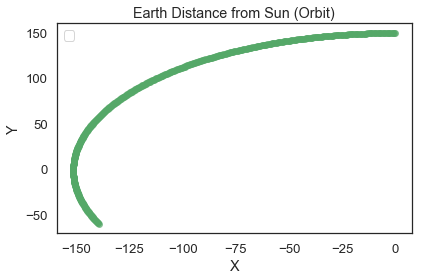

In [17]:
ts = linspace(t_0, system.t_ends, 500)*s
#plots trajectory by applying the slope func to the system, takes the state, runs the event_func, and stops when it's at specific time stamp 
results, details = run_ode_solver(system, slope_func, vectorized = True, events=event_func, t_eval = ts)
# results, details = run_ode_solver(system, slope_func, method='LSODA', min_step=99)
results.index /= 60*60*24
results.x /= 1e9
results.y /= 1e9
details
plot(results.y, results.x, 'go-')
decorate(xlabel = 'X',
        ylabel = 'Y',
        title = 'Earth Distance from Sun (Orbit)')

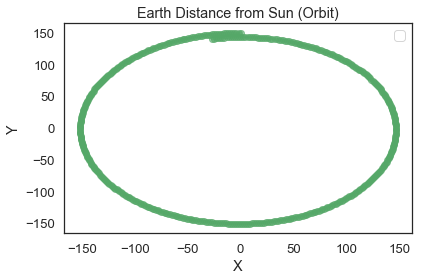

In [12]:
ts = linspace(t_0, system.t_end, 500)*s
results, details = run_ode_solver(system, slope_func, vectorized = True, events=event_func, t_eval = ts)
# results, details = run_ode_solver(system, slope_func, method='LSODA', min_step=99)
results.index /= 60*60*24
results.x /= 1e9
results.y /= 1e9
details
plot(results.y, results.x, 'go-')
decorate(xlabel = 'X',
        ylabel = 'Y',
        title = 'Earth Distance from Sun (Orbit)')

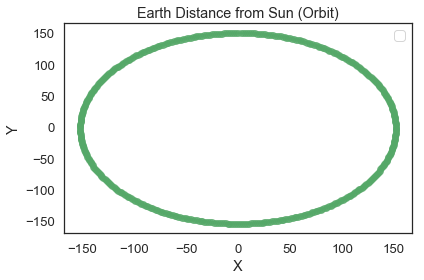

In [13]:
ts = linspace(t_0, system.t_end, 500)*s
results, details = run_ode_solver(system, slope_func, vectorized = True, events=event_func, t_eval = ts, method='RK23')
#method improves quality of the solution 
# results, details = run_ode_solver(system, slope_func, method='LSODA', min_step=99)
results.index /= 60*60*24
results.x /= 1e9
results.y /= 1e9
details
plot(results.y, results.x, 'go-')
decorate(xlabel = 'X',
        ylabel = 'Y',
        title = 'Earth Distance from Sun (Orbit)')

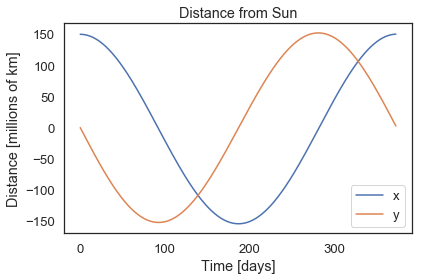

In [14]:
results.x.plot()
results.y.plot()
decorate(ylabel = 'Distance [millions of km]',
         xlabel = 'Time [days]',
        title = 'Distance from Sun')

In [15]:
final_day = get_last_value(results.index)

372.547042756875